In [31]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages (1.0)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
df=pd.read_csv('/Users/rakshithamin/Downloads/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


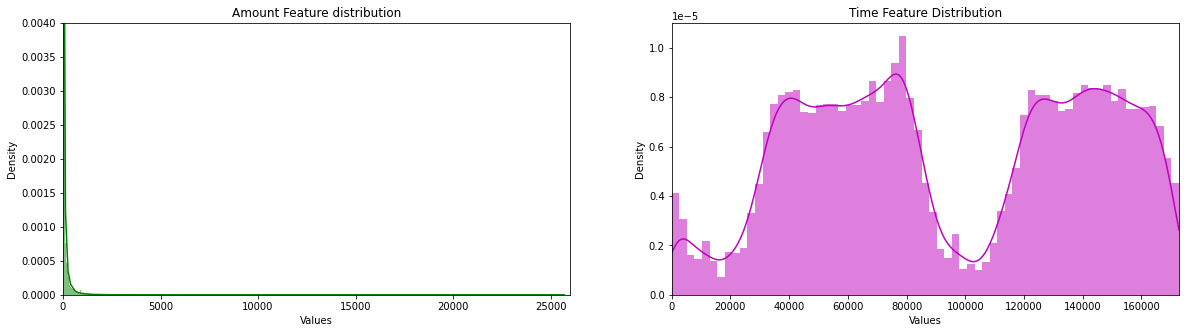

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

timeVal = df['Time'].values
amtVal = df['Amount'].values

sns.histplot(amtVal, ax=ax[0], color='g', kde=True, stat="density", linewidth=0)
ax[0].set_title('Amount Feature distribution')
ax[0].set(xlabel='Values', ylabel='Density')
ax[0].set_xlim(xmin = 0 ,xmax = 26000)
ax[0].set_ylim(ymin = 0.000 ,ymax = 0.0040)

sns.histplot(timeVal, ax=ax[1], color='m', kde=True, stat="density", linewidth=0)
ax[1].set_title('Time Feature Distribution')
ax[1].set(xlabel='Values', ylabel='Density')
ax[1].set_xlim([min(timeVal), max(timeVal)])

plt.show()

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler

df['amt_scaled'] = np.log(df['Amount']+1)
rob_scaler = RobustScaler()
df['time_scaled'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)
scale_amount_val = df['amt_scaled'].values
scale_time_val = df['time_scaled'].values

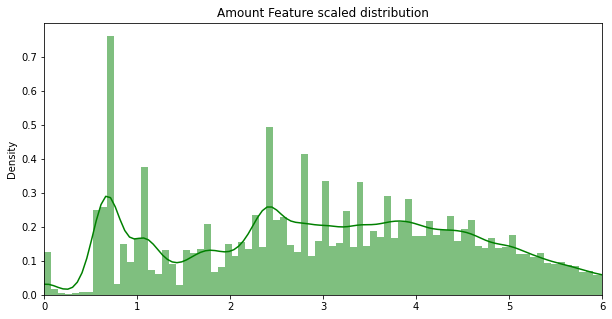

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(scale_amount_val, ax=ax, color='g', kde=True, stat="density", linewidth=0)
ax.set_title("Amount Feature scaled distribution")
ax.set_xlim(xmin = 0 ,xmax = 6)

plt.show()

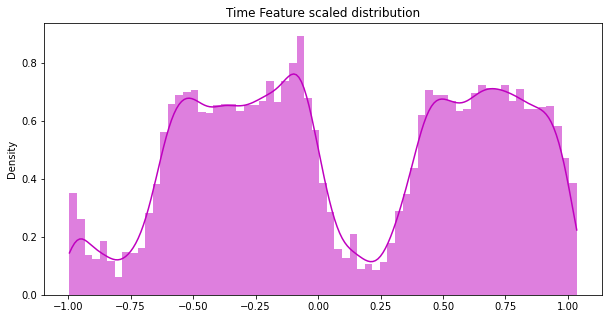

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(scale_time_val, ax=ax, color='m', kde=True, stat="density", linewidth=0)
ax.set_title("Time Feature scaled distribution")
plt.show()

Text(0, 0.5, 'No of samples')

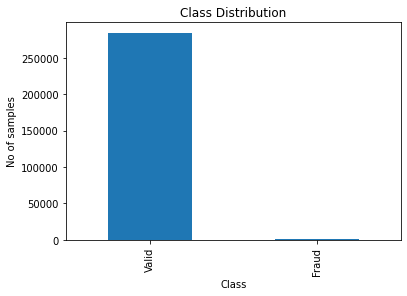

In [6]:
class_count = pd.value_counts(df['Class'], sort = False)
class_count.plot(kind='bar')
plt.title ("Class Distribution")
plt.xticks(range(2), ['Valid', 'Fraud'])
plt.xlabel ("Class")
plt.ylabel ("No of samples")

Text(0.5, 1.0, 'Correlation Heatmap')

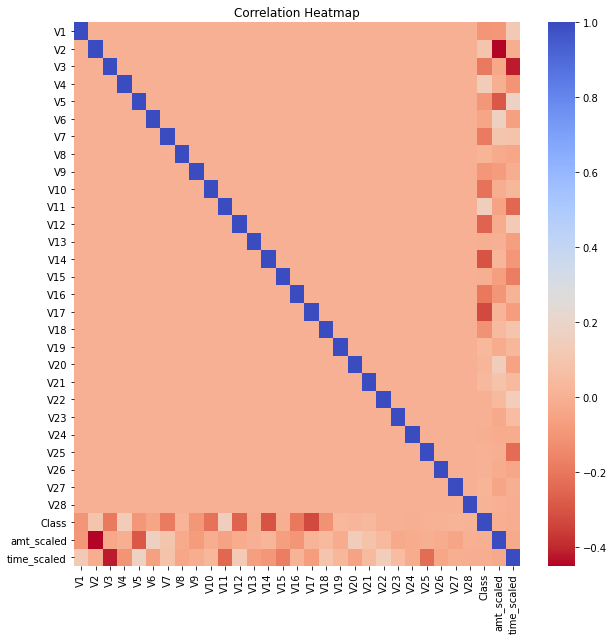

In [7]:
f, ax = plt.subplots(figsize=(10,10))

feature_corr = df.corr()
sns.heatmap(feature_corr, cmap='coolwarm_r', annot_kws={'size':15}, ax=ax)
ax.set_title("Correlation Heatmap", fontsize=12)

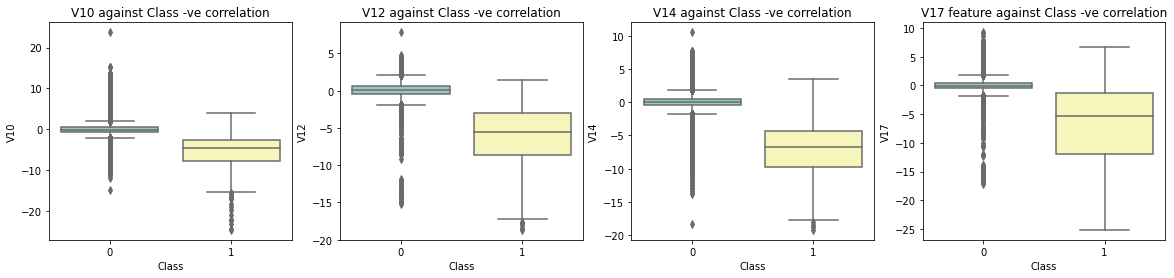

In [8]:
f,ax = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V10", data=df, palette="Set3", ax=ax[0])
ax[0].set_title('V10 against Class -ve correlation')
sns.boxplot(x="Class", y="V12", data=df, palette="Set3", ax=ax[1])
ax[1].set_title('V12 against Class -ve correlation')
sns.boxplot(x="Class", y="V14", data=df, palette="Set3", ax=ax[2])
ax[2].set_title('V14 against Class -ve correlation')
sns.boxplot(x="Class", y="V17", data=df, palette="Set3", ax=ax[3])
ax[3].set_title('V17 feature against Class -ve correlation')

plt.show()

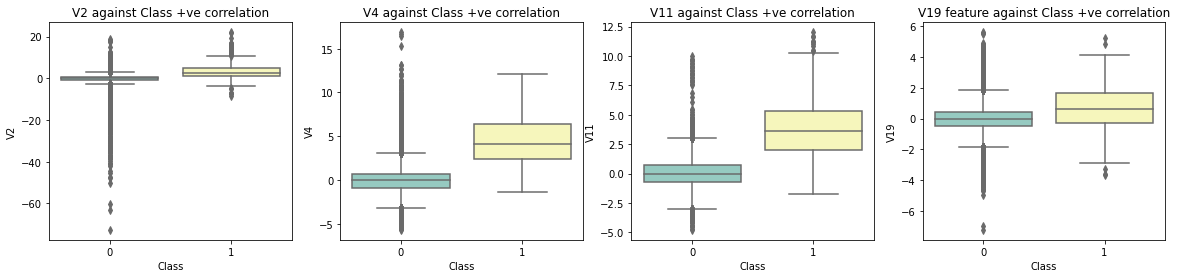

In [9]:
f,ax = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=df, palette="Set3", ax=ax[0])
ax[0].set_title('V2 against Class +ve correlation')
sns.boxplot(x="Class", y="V4", data=df, palette="Set3", ax=ax[1])
ax[1].set_title('V4 against Class +ve correlation')
sns.boxplot(x="Class", y="V11", data=df, palette="Set3", ax=ax[2])
ax[2].set_title('V11 against Class +ve correlation')
sns.boxplot(x="Class", y="V19", data=df, palette="Set3", ax=ax[3])
ax[3].set_title('V19 feature against Class +ve correlation')

plt.show()

In [11]:
print('V14 Feature Outlier Removal')
v14_1 = df['V14'].loc[df['Class'] == 1].values
qrt25, qrt75 = np.percentile(v14_1, 25), np.percentile(v14_1, 75)
print('25th percentile: {} | 75 percentile: {}'.format(qrt25, qrt75))
v14_iqr = qrt75 - qrt25

v14_cut_off = v14_iqr * 1.5
v14_lower_bound, v14_upper_bound = qrt25 - v14_cut_off, qrt75 + v14_cut_off
print('lower bound: {}'.format(v14_lower_bound))
print('upper bound: {}'.format(v14_upper_bound))
outliers = [x for x in v14_1 if x < v14_lower_bound or x > v14_upper_bound]
print('No of Outliers in V14: {}'.format(len(outliers)))

df = df.drop(df[(df['V14'] > v14_upper_bound) | (df['V14'] < v14_lower_bound)].index)

print('V12 Feature Outlier Removal')
v12_1 = df['V12'].loc[df['Class'] == 1].values
qrt25, qrt75 = np.percentile(v12_1, 25), np.percentile(v12_1, 75)
v12_iqr = qrt75 - qrt25

v12_cut_off = v12_iqr * 1.5
v12_lower_bound, v12_upper_bound = qrt25 - v12_cut_off, qrt75 + v12_cut_off
print('lower bound: {}'.format(v12_lower_bound))
print('upper bound: {}'.format(v12_upper_bound))
outliers = [x for x in v12_1 if x < v12_lower_bound or x > v12_upper_bound]
print('No of Outliers in V12: {}'.format(outliers))
df = df.drop(df[(df['V12'] > v12_upper_bound) | (df['V12'] < v12_lower_bound)].index)

print('V10 Feature Outlier Removal')
v10_1 = df['V10'].loc[df['Class'] == 1].values
qrt25, qrt75 = np.percentile(v10_1, 25), np.percentile(v10_1, 75)
v10_iqr = qrt75 - qrt25

v10_cut_off = v10_iqr * 1.5
v10_lower_bound, v10_upper_bound = qrt25 - v10_cut_off, qrt75 + v10_cut_off
print('lower bound: {}'.format(v10_lower_bound))
print('upper bound: {}'.format(v10_upper_bound))
outliers = [x for x in v10_1 if x < v10_lower_bound or x > v10_upper_bound]
print('No of Outliers in V10: {}'.format(outliers))
df = df.drop(df[(df['V10'] > v10_upper_bound) | (df['V10'] < v10_lower_bound)].index)


print('V4 Feature Outlier Removal')
v4_1 = df['V4'].loc[df['Class'] == 1].values
qrt25, qrt75 = np.percentile(v4_1, 25), np.percentile(v4_1, 75)
v4_iqr = qrt75 - qrt25

v4_cut_off = v4_iqr * 1.5
v4_lower_bound, v4_upper_bound = qrt25 - v4_cut_off, qrt75 + v4_cut_off
print('lower bound: {}'.format(v4_lower_bound))
print('upper bound: {}'.format(v4_upper_bound))
outliers = [x for x in v4_1 if x < v4_lower_bound or x > v4_upper_bound]
print('No of Outliers in V4: {}'.format(outliers))
df = df.drop(df[(df['V4'] > v4_upper_bound) | (df['V4'] < v4_lower_bound)].index)


print('V11 Feature Outlier Removal')
v11_1 = df['V11'].loc[df['Class'] == 1].values
qrt25, qrt75 = np.percentile(v11_1, 25), np.percentile(v11_1, 75)
v11_iqr = qrt75 - qrt25

v11_cut_off = v11_iqr * 1.5
v11_lower_bound, v11_upper_bound = qrt25 - v11_cut_off, qrt75 + v11_cut_off
print('lower bound: {}'.format(v11_lower_bound))
print('upper bound: {}'.format(v11_upper_bound))
outliers = [x for x in v11_1 if x < v11_lower_bound or x > v11_upper_bound]
print('No of Outliers in V11: {}'.format(outliers))
df = df.drop(df[(df['V11'] > v11_upper_bound) | (df['V11'] < v11_lower_bound)].index)

print('V19 Feature Outlier Removal')
v19_1 = df['V19'].loc[df['Class'] == 1].values
qrt25, qrt75 = np.percentile(v19_1, 25), np.percentile(v19_1, 75)
v19_iqr = qrt75 - qrt25

v19_cut_off = v19_iqr * 1.5
v19_lower_bound, v19_upper_bound = qrt25 - v19_cut_off, qrt75 + v19_cut_off
print('lower bound: {}'.format(v19_lower_bound))
print('upper bound: {}'.format(v19_upper_bound))
outliers = [x for x in v19_1 if x < v19_lower_bound or x > v19_upper_bound]
print('No of Outliers in V19: {}'.format(outliers))
df = df.drop(df[(df['V19'] > v19_upper_bound) | (df['V19'] < v19_lower_bound)].index)

V14 Feature Outlier Removal
25th percentile: -9.692722964972385 | 75 percentile: -4.282820849486866
lower bound: -17.807576138200663
upper bound: 3.8320323237414122
No of Outliers in V14: 4
V12 Feature Outlier Removal
lower bound: -17.25930926645337
upper bound: 5.597044719256134
No of Outliers in V12: [-17.7691434633638, -17.631606313870698, -18.047596570821604, -18.683714633344298, -18.553697009645802, -18.4311310279993]
V10 Feature Outlier Removal
lower bound: -15.47046969983434
upper bound: 5.099587558797303
No of Outliers in V10: [-16.6496281595399, -18.2711681738888, -15.563791338730098, -15.563791338730098, -16.7460441053944, -22.1870885620007, -22.1870885620007, -22.1870885620007, -22.1870885620007, -17.141513641289198, -16.3035376590131, -16.2556117491401, -16.6011969664137, -18.9132433348732, -20.949191554361104, -19.836148851696, -23.2282548357516, -24.403184969972802, -24.5882624372475]
V4 Feature Outlier Removal
lower bound: -3.5904703554572297
upper bound: 12.312249344016

In [10]:
from sklearn.model_selection import train_test_split
y=df['Class']
x=df.drop(['Class'], axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, stratify=y, random_state=0)

In [11]:
import matplotlib
from sklearn.utils import resample
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

def plot_dim(x,y):
    
    X_reduced_tsne = TSNE(n_components=2, random_state=10).fit_transform(x)
    X_reduced_pca = PCA(n_components=2, random_state=10).fit_transform(x)
    X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=10).fit_transform(x)
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
    f.suptitle('Dimensionality Reduction to understand separability between fraud and non-fraud', fontsize=14)

    nonfraud_leg = mpatches.Patch(color='#1F77B4', label='Non-Fraud')
    fraud_leg = mpatches.Patch(color='#FF7F0E', label='Fraud')
    colors = ['#1F77B4', '#FF7F0E']
    cmap = matplotlib.colors.ListedColormap(colors)
    
    # t-SNE Dimensionality Reduction plot
    ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], s=4, c=(y == 0), 
                cmap=cmap, label='Non-Fraud', linewidths=2)
    ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], s=4, c=(y == 1),
                cmap=cmap, label='Fraud', linewidths=2)
    ax1.set_title('t-SNE', fontsize=14)
    ax1.legend(handles=[nonfraud_leg, fraud_leg])
    ax1.grid(True)

    # PCA Dimensionality Reduction plot
    ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], s=4, c=(y == 0), 
                cmap=cmap, label='Non-Fraud', linewidths=2)
    ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], s=4, c=(y == 1),
                cmap=cmap, label='Fraud', linewidths=2)
    ax2.set_title('PCA', fontsize=14)
    ax2.legend(handles=[nonfraud_leg, fraud_leg])
    ax2.grid(True)

    # t-SVD Dimensionality Reduction plot
    ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], s=4, c=(y == 0),
                cmap=cmap, label='Non-Fraud', linewidths=2)
    ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], s=4, c=(y == 1), 
                cmap=cmap, label='Fraud', linewidths=2)
    ax3.set_title('t-SVD', fontsize=14)
    ax3.legend(handles=[nonfraud_leg, fraud_leg])
    ax3.grid(True)

    plt.show()

# Normal Data

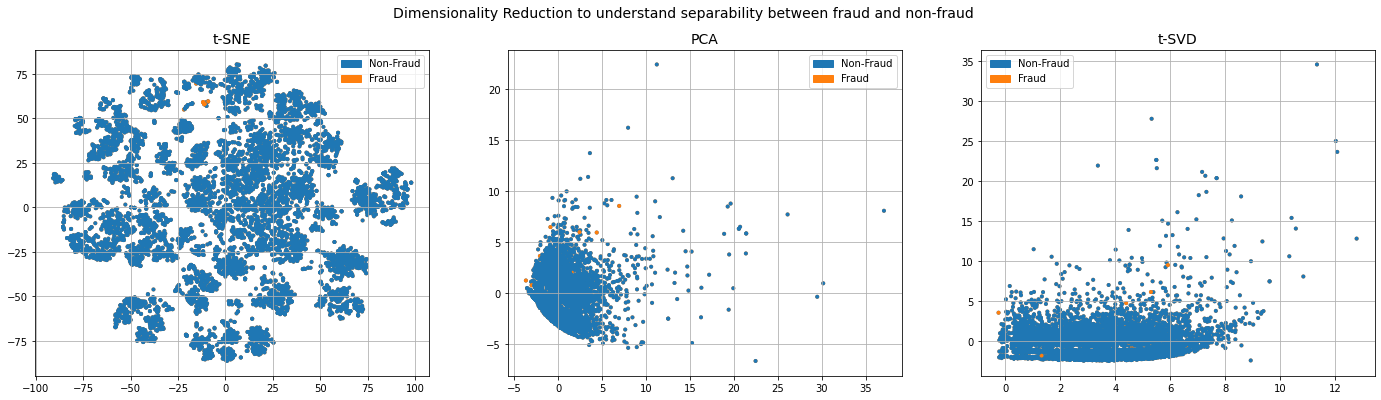

In [20]:
x_train_plot,y_train_plot=resample(x_train,y_train,n_samples=10000,random_state=0)
plot_dim(x_train_plot,y_train_plot)

# Random Under Sampling

In [12]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_rus, y_rus = rus.fit_resample(x_train, y_train)

/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


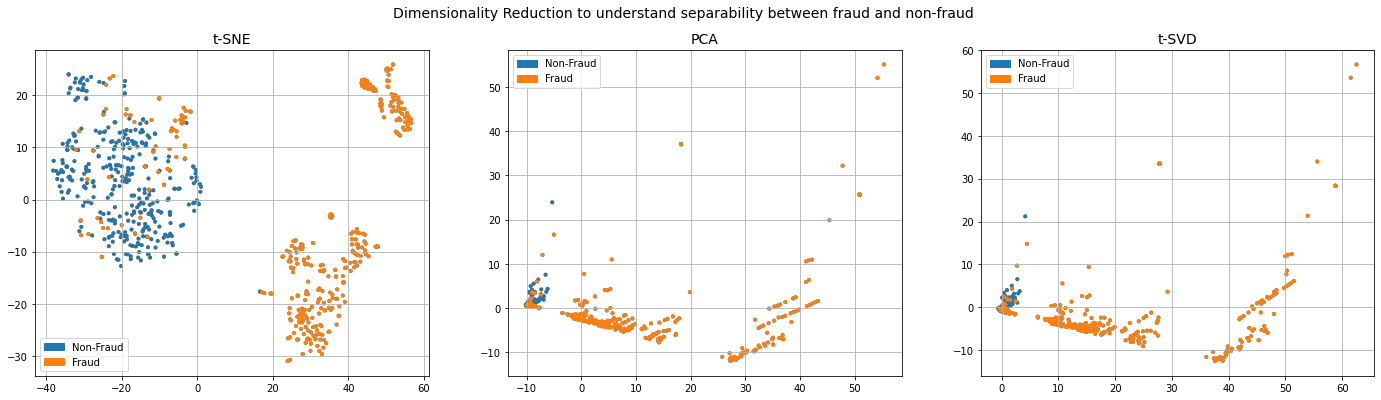

In [13]:
plot_dim(x_rus,y_rus)

# Tomek Links

In [14]:
from imblearn.under_sampling import TomekLinks
tomekl = TomekLinks(sampling_strategy='majority',n_jobs=3)
x_tomekl, y_tomekl = tomekl.fit_resample(x_train, y_train)

/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


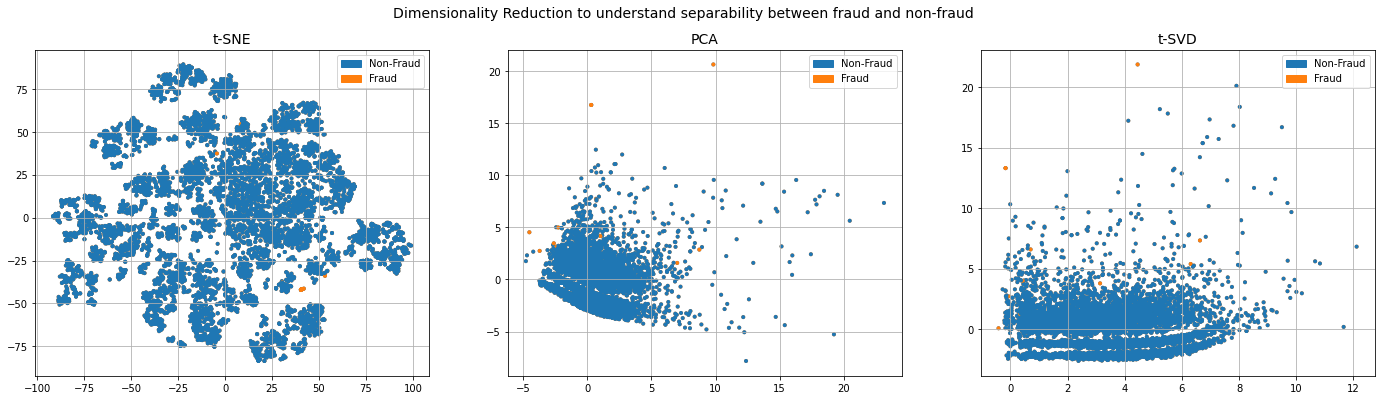

In [15]:
x_tomekl_plot,y_tomekl_plot=resample(x_tomekl,y_tomekl,n_samples=10000,random_state=0)
plot_dim(x_tomekl_plot,y_tomekl_plot)

# Random Oversampling

In [16]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
x_ros, y_ros = ros.fit_resample(x_train, y_train)

/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


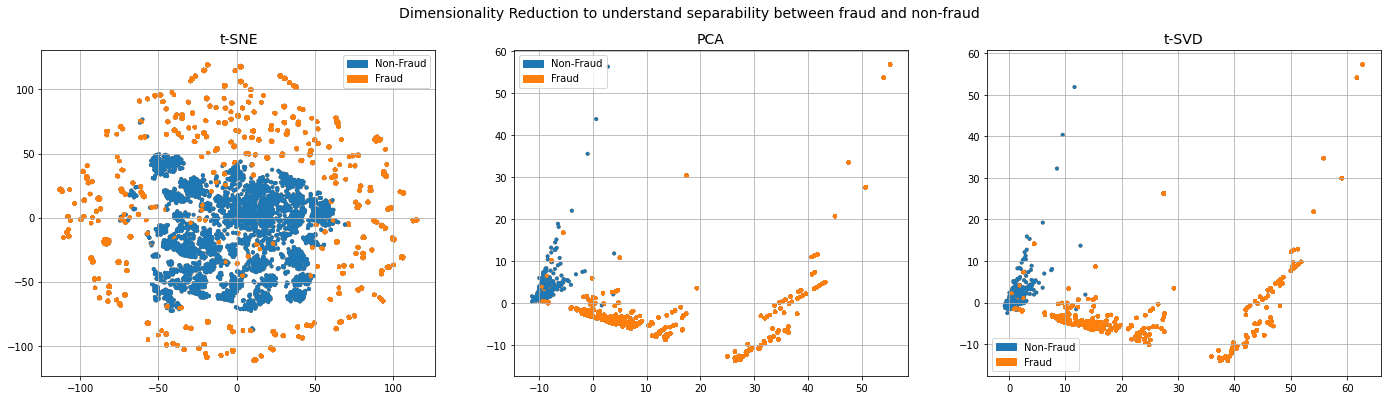

In [17]:
x_ros_plot,y_ros_plot=resample(x_ros,y_ros,n_samples=10000,random_state=0)
plot_dim(x_ros_plot,y_ros_plot)

# SMOTE

In [18]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
x_smote, y_smote = sm.fit_resample(x_train, y_train)

/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


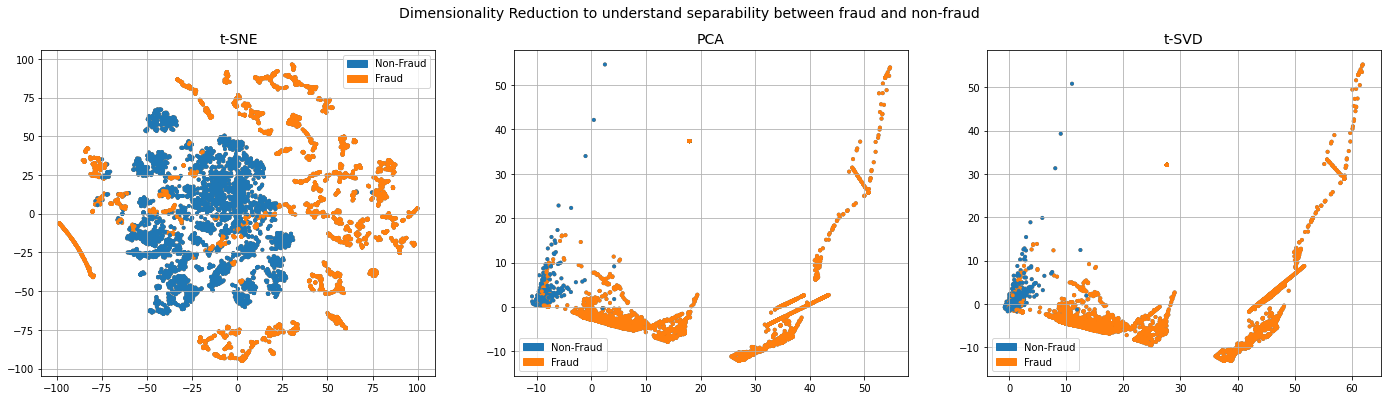

In [19]:
x_smote_plot,y_smote_plot=resample(x_smote,y_smote,n_samples=10000,random_state=0)
plot_dim(x_smote_plot,y_smote_plot)

# SMOTE-Tomek

In [20]:
from imblearn.combine import SMOTETomek 
stomek = SMOTETomek (random_state=0)
x_stomek, y_stomek = stomek.fit_resample(x_train, y_train)

/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


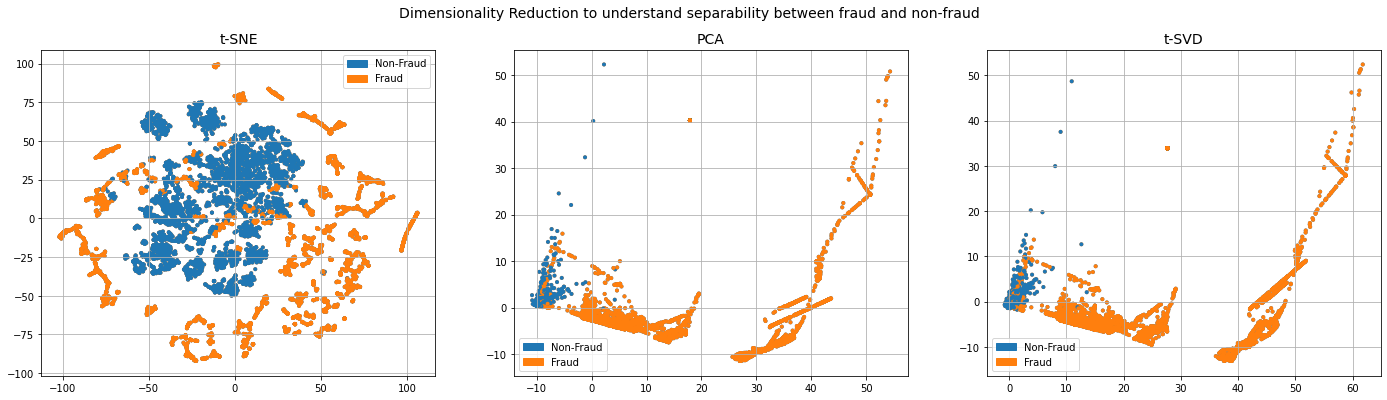

In [21]:
x_stomek_plot,y_stomek_plot=resample(x_stomek,y_stomek,n_samples=10000,random_state=0)
plot_dim(x_stomek_plot,y_stomek_plot)

# SMOTE - ENN - Tomek

In [23]:
from imblearn.under_sampling import EditedNearestNeighbours 
from imblearn.pipeline import make_pipeline
enn = EditedNearestNeighbours()
pipe = make_pipeline(
    SMOTE(sampling_strategy='minority'),
    EditedNearestNeighbours(sampling_strategy='majority'),
    TomekLinks(sampling_strategy='majority')
)

x_smtenntmk, y_smtenntmk = pipe.fit_resample(x_train, y_train)

/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


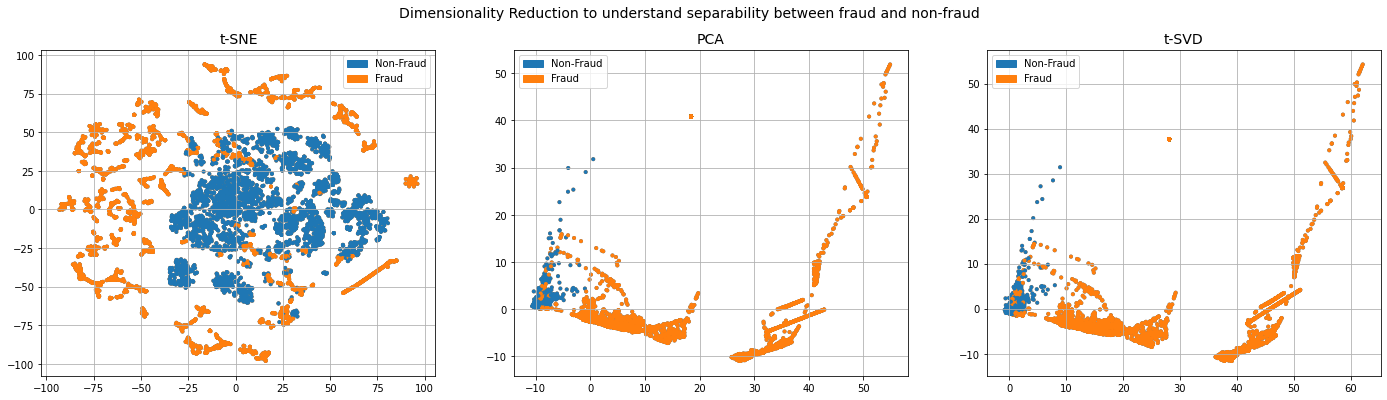

In [25]:
x_stomeennek_plot,y_stomeennek_plot=resample(x_smtenntmk,y_smtenntmk,n_samples=10000,random_state=0)
plot_dim(x_stomeennek_plot,y_stomeennek_plot)

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_prcurve(modelsscore, names):  
    precision = dict()
    recall = dict()
    for i in range(len(modelsscore)):
        model = modelsscore[i];
        precision[i], recall[i], _ = precision_recall_curve(y_test,
                                                            model)
        
        plt.plot(recall[i], precision[i], lw=2, label=names[i])

    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    plt.show()

#  Logistic Regression - Normal data

In [558]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc

In [745]:
lr1=LogisticRegression(C=0.1)
lr1.fit(x_train, y_train)

LogisticRegression(C=0.1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.72      0.56      0.63       148

    accuracy                           1.00     85443
   macro avg       0.86      0.78      0.82     85443
weighted avg       1.00      1.00      1.00     85443



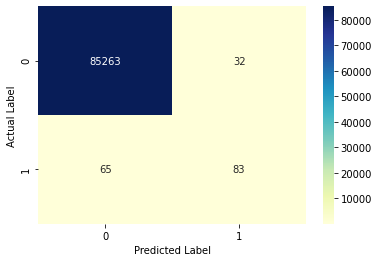

In [610]:
predlr1 = lr1.predict(x_test)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predlr1)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predlr1))

In [607]:
predlr1_probs = lr1.predict_proba(x_test)
lrprob = [predlr1_probs[:, 1]]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lrprob[0])
lr_auc = auc(lr_recall, lr_precision)
lr_auc

0.518603138585149

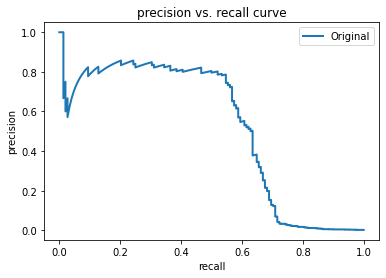

In [608]:
plot_prcurve(lrprob, ['Original'])

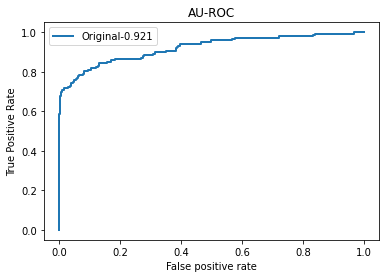

In [609]:
plot_auroc(lrprob, ['Original'])

#  Logistic Regression - Rus data

In [624]:
lr2=LogisticRegression()
lr2.fit(x_rus, y_rus)

LogisticRegression()

[[81042  4253]
 [   13   135]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85295
           1       0.03      0.91      0.06       148

    accuracy                           0.95     85443
   macro avg       0.52      0.93      0.52     85443
weighted avg       1.00      0.95      0.97     85443



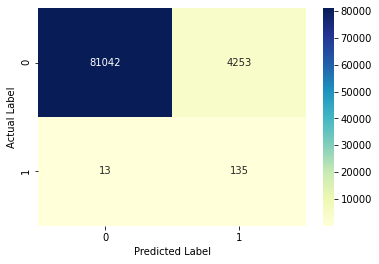

In [630]:
predlr2 = lr2.predict(x_test)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predlr2)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predlr2))

In [626]:
predlr2_probs = lr2.predict_proba(x_test)
lrprob = [predlr2_probs[:, 1]]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lrprob[0])
lr_auc = auc(lr_recall, lr_precision)
lr_auc

0.4801866808849997

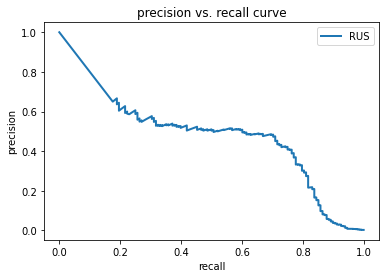

In [419]:
plot_prcurve(lrprob, ['RUS'])

#  Logistic Regression - Tomek link data

In [631]:
lr3=LogisticRegression()
lr3.fit(x_tomekl, y_tomekl)

LogisticRegression()

[[85283    12]
 [   55    93]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.63      0.74       148

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443



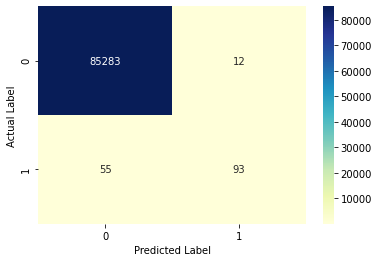

In [636]:
predlr3 = lr3.predict(x_test)
print(confusion_matrix(y_test,predlr3))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predlr3)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predlr3))

In [633]:
predlr3_probs = lr3.predict_proba(x_test)
lrprob = [predlr3_probs[:, 1]]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lrprob[0])
lr_auc = auc(lr_recall, lr_precision)
lr_auc

0.7401960252062934

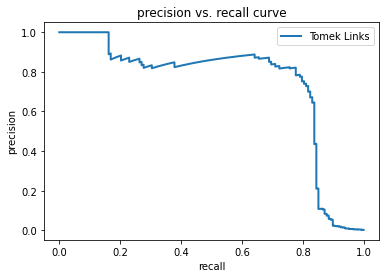

In [635]:
plot_prcurve(lrprob, ['Tomek Links'])

#  Logistic Regression - ROS data

In [637]:
lr4=LogisticRegression(random_state=0)
lr4.fit(x_ros, y_ros)

LogisticRegression(random_state=0)

[[83395  1900]
 [   15   133]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.90      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443



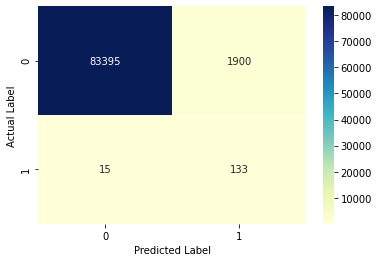

In [641]:
predlr4 = lr4.predict(x_test)
print(confusion_matrix(y_test,predlr4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predlr4)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predlr4))

In [639]:
predlr4_probs = lr4.predict_proba(x_test)
lrprob = [predlr4_probs[:, 1]]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lrprob[0])
lr_auc = auc(lr_recall, lr_precision)
lr_auc

0.736276789421168

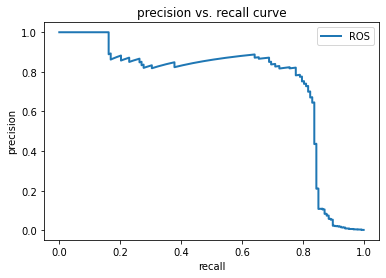

In [634]:
plot_prcurve(lrprob, ['ROS'])

#  Logistic Regression - SMOTE data

In [458]:
lr5=LogisticRegression()
lr5.fit(x_smote, y_smote)

LogisticRegression()

[[85283    12]
 [   64    84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.57      0.69       148

    accuracy                           1.00     85443
   macro avg       0.94      0.78      0.84     85443
weighted avg       1.00      1.00      1.00     85443



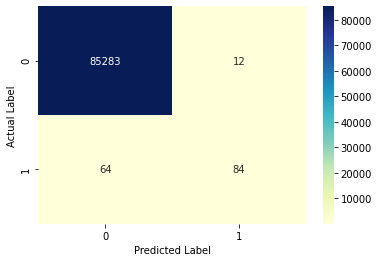

In [645]:
predlr5 = lr5.predict(x_test)
print(confusion_matrix(y_test,predlr5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predlr5)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predlr5))

In [649]:
predlr5_probs = lr5.predict_proba(x_test)
lrprob = [predlr5_probs[:, 1]]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lrprob[0])
lr_auc = auc(lr_recall, lr_precision)
lr_auc

0.7319611490505907

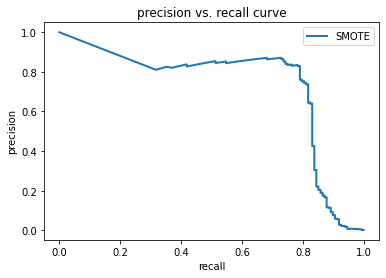

In [648]:
plot_prcurve(lrprob, ['SMOTE'])

#  Logistic Regression - SMOTE-Tomek data

In [653]:
lr6=LogisticRegression(C=0.001)
lr6.fit(x_train, y_train)

LogisticRegression(C=0.001)

[[85280    15]
 [   75    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.49      0.62       148

    accuracy                           1.00     85443
   macro avg       0.91      0.75      0.81     85443
weighted avg       1.00      1.00      1.00     85443



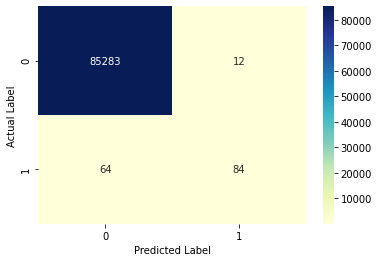

In [668]:
predlr6 = lr6.predict(x_test)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predlr6)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predlr6))

In [493]:
predlr6_probs = lr6.predict_proba(x_test)
lrprob = [predlr6_probs[:, 1]]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lrprob[0])
lr_auc = auc(lr_recall, lr_precision)
lr_auc

0.7362921885729229

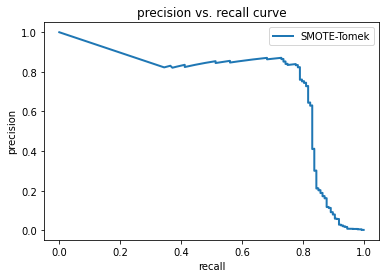

In [465]:
plot_prcurve(lrprob, ['SMOTE-Tomek'])

#  Logistic Regression - SMOTE-ENN-Tomek data

In [663]:
lr7=LogisticRegression()
lr7.fit(x_smtenntmk, y_smtenntmk)

LogisticRegression(C=1)

[[85283    12]
 [   56    92]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.62      0.73       148

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



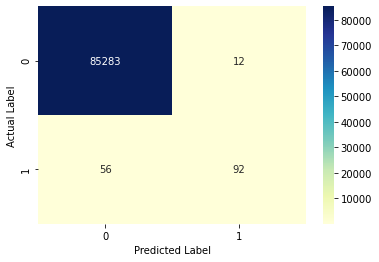

In [667]:
predlr7 = lr7.predict(x_test)
print(confusion_matrix(y_test,predlr7))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predlr7)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predlr7))

In [665]:
predlr7_probs = lr7.predict_proba(x_test)
lrprob = [predlr7_probs[:, 1]]
yhat = lr7.predict(x_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lrprob[0])
lr_auc = auc(lr_recall, lr_precision)
lr_auc

0.7501772379980496

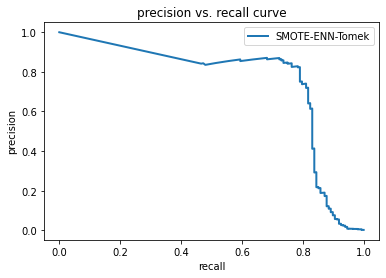

In [666]:
plot_prcurve(lrprob, ['SMOTE-ENN-Tomek'])

# Random Forest Classfier - Normal data

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

In [533]:
rdf1=RandomForestClassifier()
rdf1.fit(x_train, y_train)

RandomForestClassifier()

[[85290     5]
 [   40   108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.73      0.83       148

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



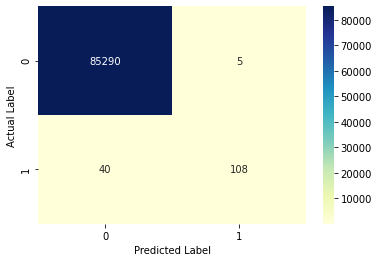

In [671]:
predrdf1 = rdf1.predict(x_test)
print(confusion_matrix(y_test,predrdf1))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predrdf1)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predrdf1))

In [673]:
predrdf1_probs = rdf1.predict_proba(x_test)
prob = [predrdf1_probs[:, 1]]
rf_precision, rf_recall, _ = precision_recall_curve(y_test, prob[0])
rf_auc = auc(rf_recall, rf_precision)
rf_auc

0.8269648396123317

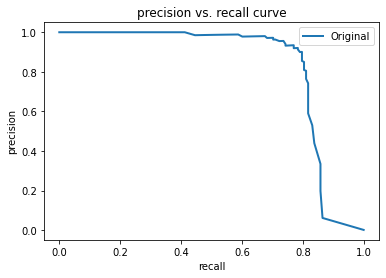

In [674]:
plot_prcurve(prob, ['Original'])

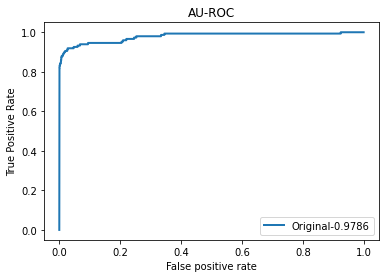

In [675]:
plot_auroc(lrprob, ['Original'])

# Random Forest Classfier - RUS data

In [29]:
rdf2=RandomForestClassifier(random_state=0)
rdf2.fit(x_rus, y_rus)

RandomForestClassifier(random_state=0)

[[83070  2225]
 [   16   132]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.89      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.99     85443



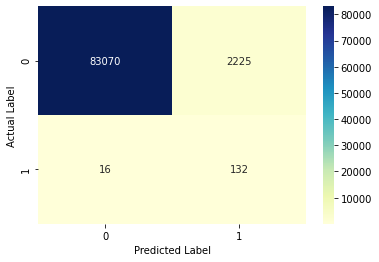

In [676]:
predrdf2 = rdf2.predict(x_test)
print(confusion_matrix(y_test,predrdf2))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predrdf2)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predrdf2))

In [571]:
predrdf2_probs = rdf2.predict_proba(x_test)
prob = [predrdf2_probs[:, 1]]
yhat = rdf2.predict(x_test)

In [572]:
rf_precision, rf_recall, _ = precision_recall_curve(y_test, prob[0])
rf_auc = auc(rf_recall, rf_precision)
rf_auc

0.7381021165318906

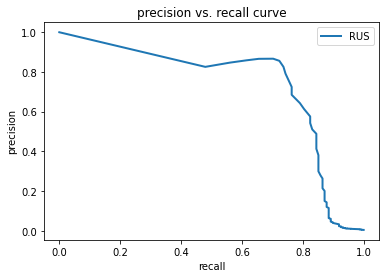

In [573]:
plot_prcurve(prob, ['RUS'])

# Tomek Links

In [678]:
rdf10=RandomForestClassifier(random_state=0)
rdf10.fit(x_tomekl, y_tomekl)

RandomForestClassifier(random_state=0)

[[85290     5]
 [   40   108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.73      0.83       148

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



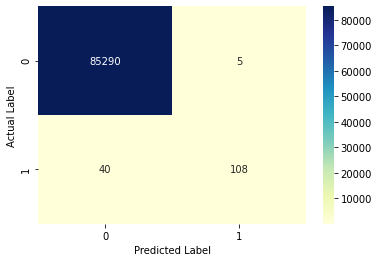

In [679]:
predrdf10 = rdf1.predict(x_test)
print(confusion_matrix(y_test,predrdf10))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predrdf10)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predrdf10))

In [680]:
predrdf10_probs = rdf10.predict_proba(x_test)
prob = [predrdf10_probs[:, 1]]
yhat = rdf10.predict(x_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, prob[0])
rf_auc = auc(rf_recall, rf_precision)
rf_auc

0.8298087215424444

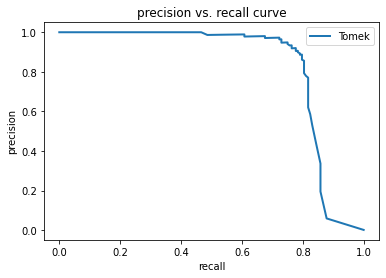

In [681]:
plot_prcurve(prob, ['Tomek'])

# Random Forest Classfier - ROS data

In [669]:
rdf3=RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, random_state=0)
rdf3.fit(x_ros, y_ros)

RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=3,
                       min_samples_split=8, random_state=0)

[[85288     7]
 [   40   108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.73      0.82       148

    accuracy                           1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



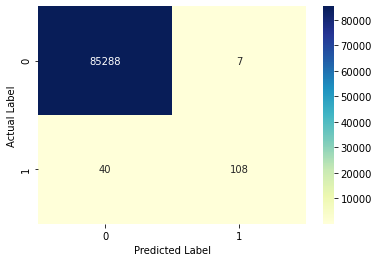

In [682]:
predrdf3 = rdf3.predict(x_test)
print(confusion_matrix(y_test,predrdf3))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predrdf3)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predrdf3))

In [575]:
predrdf3_probs = rdf3.predict_proba(x_test)
prob = [predrdf3_probs[:, 1]]
yhat = rdf3.predict(x_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, prob[0])
rf_auc = auc(rf_recall, rf_precision)
rf_auc

0.8472248925379036

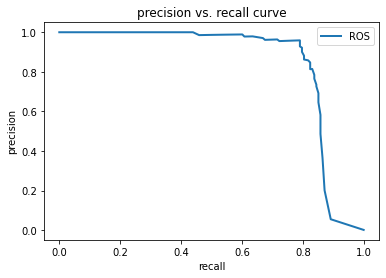

In [578]:
plot_prcurve(prob, ['ROS'])

# Random Forest Classfier - SMOTE data

In [89]:
rdf4=RandomForestClassifier(random_state=0)
rdf4.fit(x_smote, y_smote)

RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.79      0.82       148

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



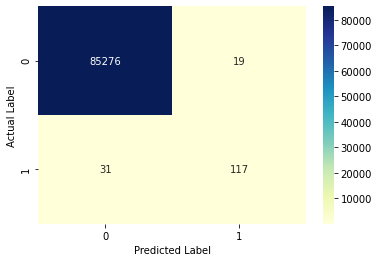

In [755]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predrdf4)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predrdf4))

In [757]:
predrdf4_probs = rdf4.predict_proba(x_test)
prob = [predrdf4_probs[:, 1]]
yhat = rdf4.predict(x_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, prob[0])
rf_auc = auc(rf_recall, rf_precision)
rf_auc

0.8204181225542806

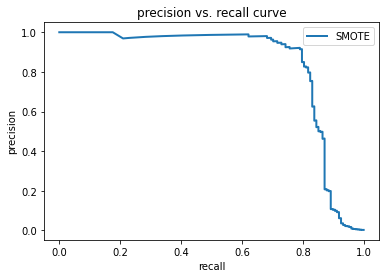

In [756]:
plot_prcurve(prob, ['SMOTE'])

# Random Forest Classfier - SMOTE-Tomek

In [35]:
rdf5=RandomForestClassifier(random_state=0)
rdf5.fit(x_stomek, y_stomek)

RandomForestClassifier(random_state=0)

[[85284    11]
 [   32   116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.78      0.84       148

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



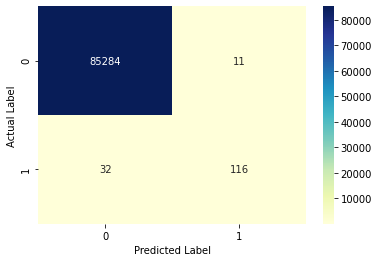

In [687]:
predrdf5 = rdf5.predict(x_test)
print(confusion_matrix(y_test,predrdf5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predrdf5)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predrdf5))

In [583]:
predrdf5_probs = rdf5.predict_proba(x_test)
prob = [predrdf5_probs[:, 1]]
yhat = rdf5.predict(x_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, prob[0])
rf_auc = auc(rf_recall, rf_precision)
rf_auc

0.8470371624208397

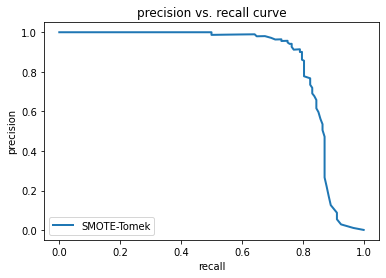

In [584]:
plot_prcurve(prob, ['SMOTE-Tomek'])

# Random Forest Classfier - SMOTE-ENN-Tomek

In [101]:
pipe = make_pipeline(
    SMOTE(sampling_strategy='minority'),
    EditedNearestNeighbours(sampling_strategy='majority'),
    TomekLinks(sampling_strategy='majority')
)

x_smtenntmk, y_smtenntmk = pipe.fit_resample(x_train, y_train)

In [564]:
rdf9=RandomForestClassifier(n_estimators = 300)
rdf9.fit(x_smtenntmk, y_smtenntmk)

RandomForestClassifier(n_estimators=300)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.80      0.86       148

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



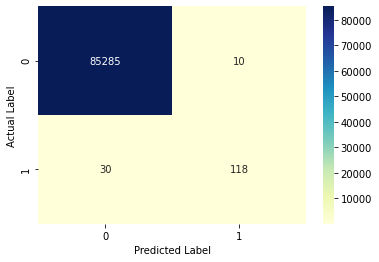

In [752]:
predrdf9 = rdf9.predict(x_test)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predrdf9)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predrdf9))

In [753]:
predrdf9_probs = rdf9.predict_proba(x_test)
prob = [predrdf9_probs[:, 1]]
yhat = rdf9.predict(x_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, prob[0])
rf_auc = auc(rf_recall, rf_precision)
rf_auc

0.8748187445503646

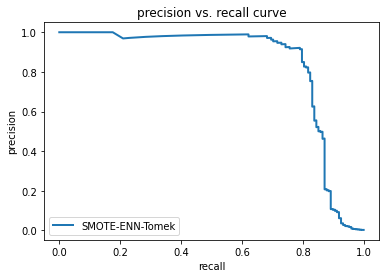

In [754]:
plot_prcurve(prob, ['SMOTE-ENN-Tomek'])

# XGBoost-Normal Data

In [712]:
import xgboost as xgb

xg = xgb.XGBClassifier(learning_rate=2.3)
xg.fit(x_train, y_train)

/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:03:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=2.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[[85283    12]
 [   42   106]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.72      0.80       148

    accuracy                           1.00     85443
   macro avg       0.95      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443



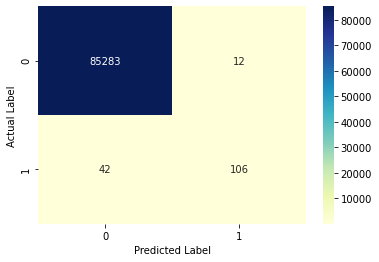

In [713]:
predxgb1 = xg.predict(x_test)
print(confusion_matrix(y_test,predxgb1))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predxgb1)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predxgb1))

In [717]:
predxgb1_probs = xg.predict_proba(x_test)
prob = [predxgb1_probs[:, 1]]
yhat = xg.predict(x_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, prob[0])
rf_auc = auc(rf_recall, rf_precision)
rf_auc

0.7686522366044424

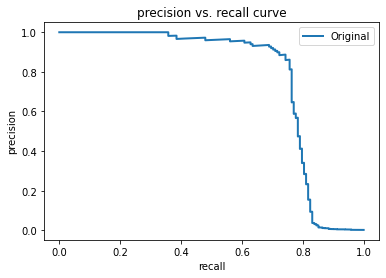

In [718]:
plot_prcurve(prob, ['Original'])

# XGBoost-RUS

In [43]:
from xgboost import XGBClassifier

In [44]:
xg2 = XGBClassifier(random_state=0)
xg2.fit(x_rus, y_rus)

[22:39:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[[80979  4316]
 [   13   135]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85295
           1       0.03      0.91      0.06       148

    accuracy                           0.95     85443
   macro avg       0.52      0.93      0.52     85443
weighted avg       1.00      0.95      0.97     85443



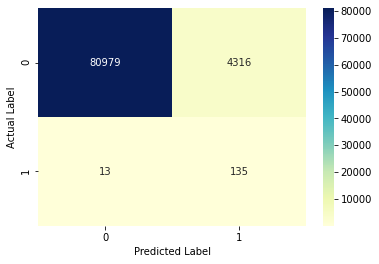

In [716]:
x_test_arr = x_test.values
predxgb2 = xg2.predict(x_test_arr)
print(confusion_matrix(y_test,predxgb2))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predxgb2)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predxgb2))

In [719]:
predxgb2_probs = xg2.predict_proba(x_test)
prob = [predxgb2_probs[:, 1]]
yhat = xg2.predict(x_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, prob[0])
rf_auc = auc(rf_recall, rf_precision)
rf_auc

0.6634698704134435

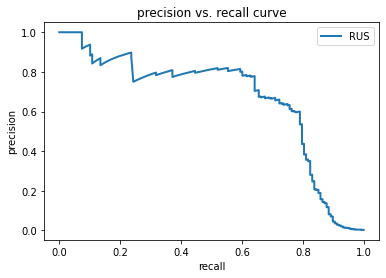

In [720]:
plot_prcurve(prob, ['RUS'])

# XGBoost-Tomek

In [727]:
xg10 = XGBClassifier(random_state=0)
xg10.fit(x_tomekl, y_tomekl)

/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:03:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[[85291     4]
 [   37   111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.75      0.84       148

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



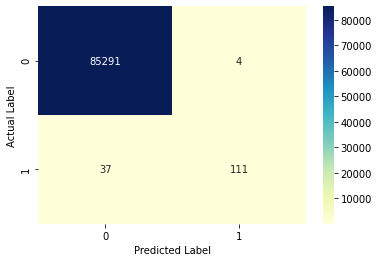

In [729]:
predxgb10 = xg10.predict(x_test_arr)
print(confusion_matrix(y_test,predxgb10))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predxgb10)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predxgb10))

In [730]:
predxgb10_probs = xg10.predict_proba(x_test)
prob = [predxgb10_probs[:, 1]]
yhat = xg10.predict(x_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, prob[0])
rf_auc = auc(rf_recall, rf_precision)
rf_auc

0.8427690142172471

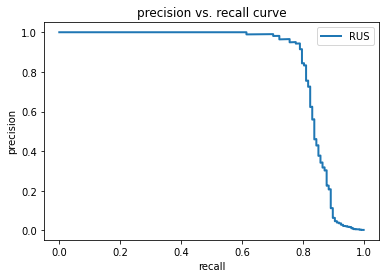

In [731]:
plot_prcurve(prob, ['RUS'])

# XGBoost-ROS

In [723]:
from xgboost import XGBClassifier
xg3 = XGBClassifier(learning_rate=1)
xg3.fit(x_ros, y_ros)

/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:07:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[[85286     9]
 [   31   117]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.79      0.85       148

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



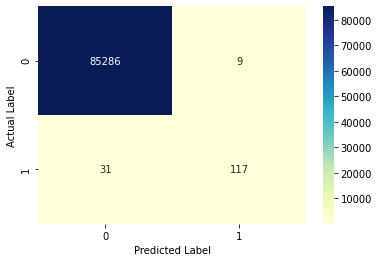

In [732]:
predxgb3 = xg3.predict(x_test_arr)
print(confusion_matrix(y_test,predxgb3))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predxgb3)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predxgb3))

In [734]:
predxgb3_probs = xg3.predict_proba(x_test)
prob = [predxgb3_probs[:, 1]]
yhat = xg3.predict(x_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, prob[0])
rf_auc = auc(rf_recall, rf_precision)
rf_auc

0.8185652565542834

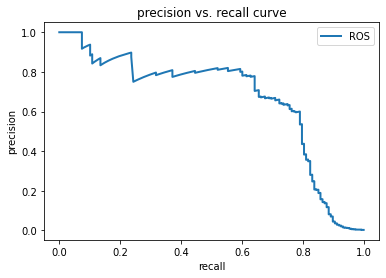

In [726]:
plot_prcurve(prob, ['ROS'])

# XGBoost-SMOTE

In [48]:
xg4 = xgb.XGBClassifier(random_state=0)
xg4.fit(x_smote, y_smote)

/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:42:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[[85263    32]
 [   29   119]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.79      0.80      0.80       148

    accuracy                           1.00     85443
   macro avg       0.89      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



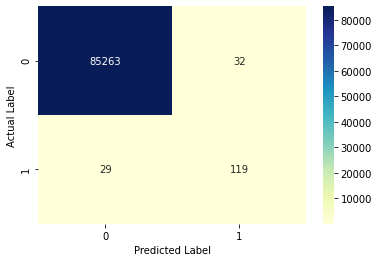

In [735]:
predxgb4 = xg4.predict(x_test_arr)
print(confusion_matrix(y_test,predxgb4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predxgb4)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predxgb4))

In [738]:
predxgb4_probs = xg4.predict_proba(x_test)
prob = [predxgb4_probs[:, 1]]
yhat = xg4.predict(x_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, prob[0])
rf_auc = auc(rf_recall, rf_precision)
rf_auc

0.8370997225090453

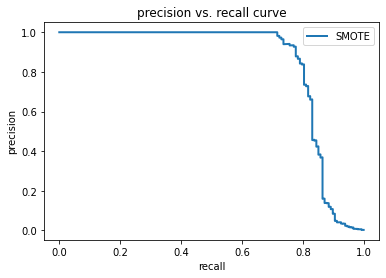

In [739]:
plot_prcurve(prob, ['SMOTE'])

# XGBoost-SMOTE-Tomek

In [50]:
xg5 = xgb.XGBClassifier(random_state=0)
xg5.fit(x_stomek, y_stomek)

/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:44:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[[85263    32]
 [   27   121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.79      0.82      0.80       148

    accuracy                           1.00     85443
   macro avg       0.90      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443



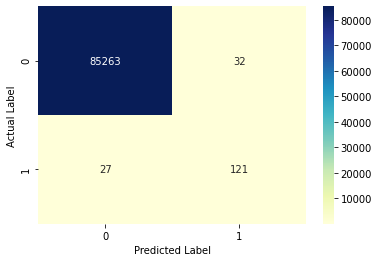

In [740]:
predxgb5 = xg5.predict(x_test_arr)
print(confusion_matrix(y_test,predxgb5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predxgb5)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predxgb5))

In [741]:
predxgb5_probs = xg5.predict_proba(x_test)
prob = [predxgb5_probs[:, 1]]
yhat = xg5.predict(x_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, prob[0])
rf_auc = auc(rf_recall, rf_precision)
rf_auc

0.8433106692444038

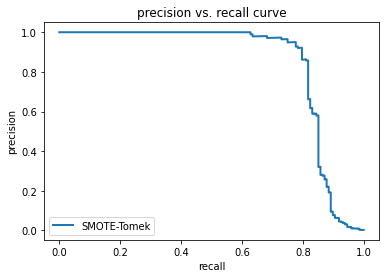

In [742]:
plot_prcurve(prob, ['SMOTE-Tomek'])

In [736]:
xg6 = xgb.XGBClassifier(random_state=0)
xg6.fit(x_smtenntmk, y_smtenntmk)

/Users/rakshithamin/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[[85258    37]
 [   26   122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.82      0.79       148

    accuracy                           1.00     85443
   macro avg       0.88      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443



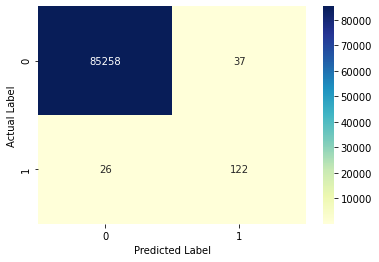

In [737]:
predxgb6 = xg6.predict(x_test_arr)
print(confusion_matrix(y_test,predxgb6))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predxgb6)), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predxgb6))

In [743]:
predxgb6_probs = xg6.predict_proba(x_test)
prob = [predxgb6_probs[:, 1]]
yhat = xg6.predict(x_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, prob[0])
rf_auc = auc(rf_recall, rf_precision)
rf_auc

0.8382936145137696

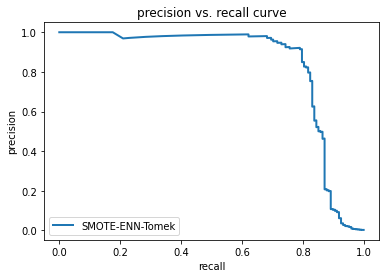

In [744]:
plot_prcurve(prob, ['SMOTE-ENN-Tomek'])

In [200]:
def grid_search(X, y, search_verbose=1):
    params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
    }
    rfc = RandomForestClassifier(random_state=0)
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)
    grid_search = GridSearchCV(estimator=rfc, param_grid=params, scoring="roc_auc", n_jobs=1, cv=skf.split(X,y), verbose=search_verbose)
    grid_search.fit(X, y)
    print("Best estimator: ")
    print(grid_search.best_estimator_)
    print("Parameters: ", grid_search.best_params_)
    print("Highest AUC: %.2f" % grid_search.best_score_)
    return grid_search.best_params_

In [74]:
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [205]:
rows = random.sample(np.arange(0,len(x_smtenntmk.index)).tolist(), 1000)
model_params = grid_search(x_smtenntmk.iloc[rows,], y_smtenntmk.iloc[rows,])

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best estimator: 
RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=4,
                       min_samples_split=8, n_estimators=200, random_state=0)
Parameters:  {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 200}
Highest AUC: 0.99


In [93]:
rdf8=RandomForestClassifier()
rdf8.set_params(**model_params)
rdf8.fit(x_stomek, y_stomek)

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=1000)